# Sentiment Analysis Restaurant Reviews

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Importing the dataset

In [3]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [4]:
dataset.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


## Cleaning the texts

In [5]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /Users/efi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
print(len(corpus),'\n\n',corpus)

1000 

 ['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid c

## Creating the Bag of Words model

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)

#corpus is now our new data
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [9]:
print(X.shape)

(1000, 1566)


## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state = 42)

## Training the Naive Bayes model on the Training set

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

## Predicting the Test set results

In [39]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]

## Making the Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75        96
           1       0.79      0.71      0.75       104

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[76 20]
 [30 74]]


0.75

In [42]:
#predicting
probs = classifier.predict_proba(X_test)
prob_df = pd.DataFrame(probs, columns=classifier.classes_)
preds = list(prob_df[1].values)
prob_df.head(10)

,0,1
0,0.815467,0.184533
1,0.028028,0.971972
2,0.059683,0.940317
3,0.000308,0.999692
4,0.356525,0.643475
5,0.007174,0.992826
6,0.529851,0.470149
7,0.046635,0.953365
8,0.787936,0.212064
9,0.177892,0.822108


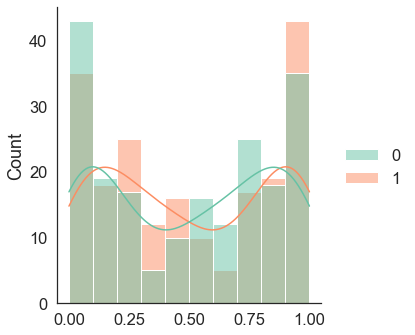

In [43]:
import seaborn as sns
sns.set_palette("Set2")
sns.set_style('white')
sns.displot(prob_df,kde=True)

[[76 20]
 [30 74]]


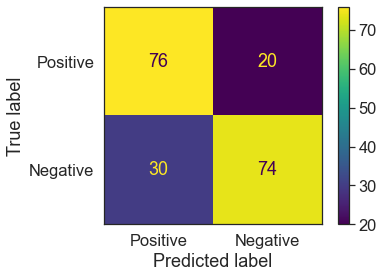

In [44]:
#labels =['True Neg','False Pos','False Neg','True Pos']
#cm = confusion_matrix(y_test,predict_nb)#,normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Positive','Negative'])
cmd.plot()
print(cm)

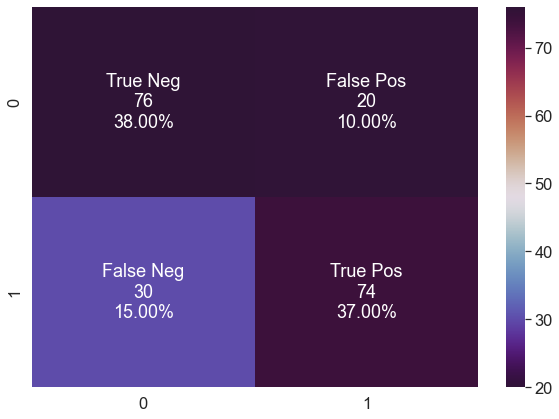

In [45]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
f = plt.figure(figsize=(10, 7))
sns.set(font_scale=1.5)
tws=sns.color_palette("twilight_shifted", as_cmap=True)
sns.heatmap(cm, annot=labels, fmt='', cmap=tws);

## With Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import Pipeline
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)



RandomForestClassifier()

In [47]:
y_pred = rf_clf.predict(X_test)

In [49]:
#predicting
probs = rf_clf.predict_proba(X_test)
prob_df = pd.DataFrame(probs, columns=rf_clf.classes_)
preds = list(prob_df[1].values)
prob_df.head(10)

,0,1
0,0.83,0.17
1,0.07,0.93
2,0.27,0.73
3,0.00,1.00
4,0.65,0.35
5,0.01,0.99
6,0.76,0.24
7,0.19,0.81
8,0.81,0.19
9,0.47,0.53


In [50]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.66      0.75       125
           1       0.60      0.83      0.69        75

    accuracy                           0.73       200
   macro avg       0.73      0.75      0.72       200
weighted avg       0.76      0.72      0.73       200



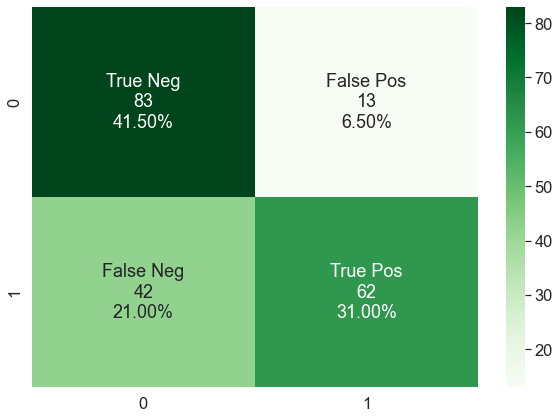

In [57]:
#labels =['True Neg','False Pos','False Neg','True Pos']
#cm = confusion_matrix(y_test,predict_nb)#,normalize='all')
cm = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
f = plt.figure(figsize=(10, 7))
sns.set(font_scale=1.5)
Greens=sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm, annot=labels, fmt='', cmap=Greens);